# import

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# read data

## London Boroughs

<>:1: SyntaxWarning: invalid escape sequence '\l'
<>:1: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Chailee\AppData\Local\Temp\ipykernel_20748\2528172647.py:1: SyntaxWarning: invalid escape sequence '\l'
  lon_boro = 'Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp'


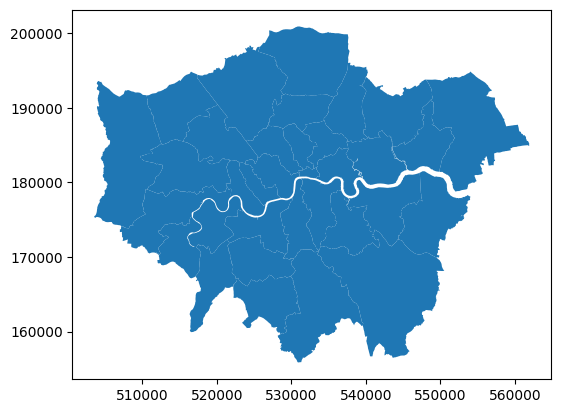

In [2]:
lon_boro = 'Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp'

lon_borough = gpd.read_file(lon_boro)

# Plot the London borough
lon_borough.plot()

# Show the plot
plt.show()


In [3]:
# 检查DataFrame的列，以确定哪一列包含区域名称
print(lon_borough.columns)

# 假设区域名称存储在名为'NAME'的列中，打印出所有唯一的区域名称
# 请根据实际列名调整'NAME'
print(lon_borough['NAME'].unique())

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')
['Kingston upon Thames' 'Croydon' 'Bromley' 'Hounslow' 'Ealing' 'Havering'
 'Hillingdon' 'Harrow' 'Brent' 'Barnet' 'Lambeth' 'Southwark' 'Lewisham'
 'Greenwich' 'Bexley' 'Enfield' 'Waltham Forest' 'Redbridge' 'Sutton'
 'Richmond upon Thames' 'Merton' 'Wandsworth' 'Hammersmith and Fulham'
 'Kensington and Chelsea' 'Westminster' 'Camden' 'Tower Hamlets'
 'Islington' 'Hackney' 'Haringey' 'Newham' 'Barking and Dagenham'
 'City of London']


(500648.735, 564876.965, 153596.645, 203188.055)

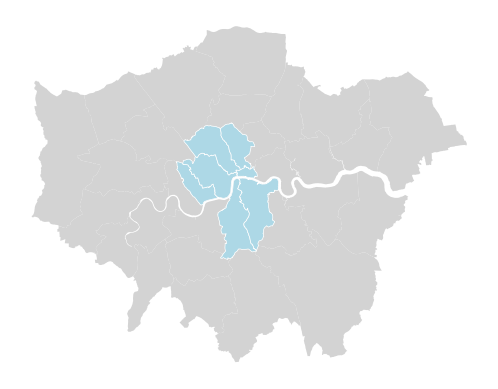

In [4]:
# 指定要绘制的区域列表
areas_to_plot = ['City of London', 'Islington', 'Kensington and Chelsea', 'Westminster', 'Camden', 'Lambeth', 'Southwark']

# 使用isin方法过滤出指定的区域
filtered_boroughs = lon_borough[lon_borough['NAME'].isin(areas_to_plot)]

# 绘制整个London_borough作为背景
lon_borough.plot(color='lightgray', edgecolor='none')  # 去除外框

# 在同一个图上绘制filtered_boroughs以突出指定区域
filtered_boroughs.plot(ax=plt.gca(), color='lightblue', edgecolor='white', linewidth=0.5)  # 边界清晰画出

# 去除坐标轴
plt.axis('off')

# 显示图形
# plt.show()

(522277.77999999997, 537381.22, 168731.965, 188884.73500000002)

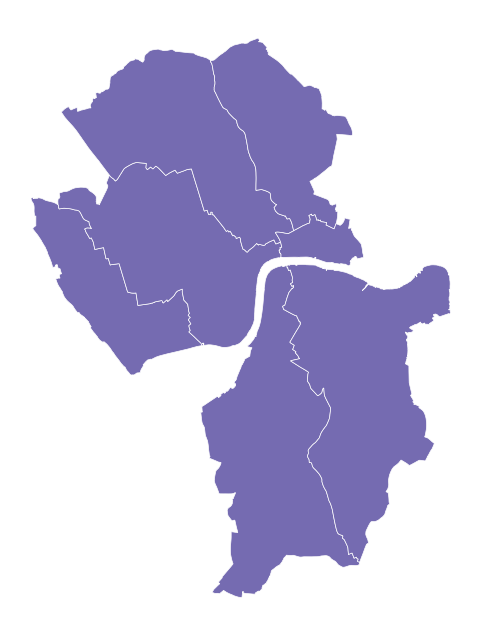

In [24]:
# 创建一个大图来显示filtered_boroughs
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制filtered_boroughs
filtered_boroughs.plot(ax=ax, color='#756bb1', edgecolor='white', linewidth=0.5)


# 去除小图的坐标轴
ax.axis('off')


# plt.show()

## London Wards

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Chailee\AppData\Local\Temp\ipykernel_20748\767458751.py:2: SyntaxWarning: invalid escape sequence '\l'
  lon_city = 'Data\london_boundaries\London-wards-2018\London-wards-2018_ESRI\London_Ward_CityMerged.shp'


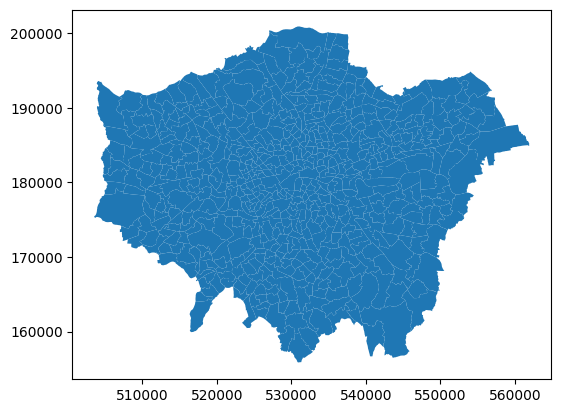

In [6]:
# Read the shapefile
lon_city = 'Data\london_boundaries\London-wards-2018\London-wards-2018_ESRI\London_Ward_CityMerged.shp'
lon_wards = gpd.read_file(lon_city)

# Plot the London borough
lon_wards.plot()

# Show the plot
plt.show()


In [7]:
# 读取Shapefile文件
lon_wards = gpd.read_file('Data\\london_boundaries\\London-wards-2018\\London-wards-2018_ESRI\\London_Ward_CityMerged.shp')

# 检查DataFrame的列，以确定哪一列包含区域名称
print(lon_wards.columns)

# 假设区域名称存储在名为'NAME'的列中，打印出所有唯一的区域名称
# 请根据实际列名调整'NAME'
print(lon_wards['NAME'].unique())

Index(['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA',
       'geometry'],
      dtype='object')
['Chessington South' 'Tolworth and Hook Rise' 'Berrylands' 'Alexandra'
 'Beverley' 'Coombe Hill' 'Chessington North and Hook' 'Surbiton Hill'
 'Old Malden' "St. Mark's" 'Grove' 'Canbury' 'Norbiton' 'Coombe Vale'
 'St. James' 'Tudor' 'Coulsdon Town' 'Purley & Woodcote' 'Waddon'
 'Old Coulsdon' 'Kenley' 'Purley Oaks & Riddlesdown' 'Sanderstead'
 'Selsdon Vale & Forestdale' 'South Croydon' 'Selsdon & Addington Village'
 'South Norwood' 'Shirly South' 'Shirley North' 'Broad Green'
 'West Thornton' 'Bensham Manor' 'Norbury & Pollards Hill' 'Norbury Park'
 'New Addington South' 'Fairfield' 'Park Hill & Whitgift'
 'Addiscombe West' 'Addiscombe East' 'New Addington North' 'Selhurst'
 'Woodside' 'Thornton Heath' 'Crystal Palace & Upper Norwood' 'Darwin'
 'Hayes and Coney Hall' 'Bromley Common and Keston'
 'Chelsfield and Pratts Bottom' 'Biggin Hill' 'West Wickham' 'Clock House

In [11]:
# check head(10) of columns ['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA', 'geometry']
# Assuming 'df' is your DataFrame
selected_columns = ['NAME', 'GSS_CODE', 'DISTRICT', 'LAGSSCODE', 'HECTARES', 'NONLD_AREA', 'geometry']
lon_wards.loc[:, selected_columns].head(50)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."
5,Coombe Hill,E05000406,Kingston upon Thames,E09000021,442.170,0.0,"POLYGON ((521296.499 172258.301, 521300.902 17..."
6,Chessington North and Hook,E05000404,Kingston upon Thames,E09000021,192.980,0.0,"POLYGON ((519552.998 164295.600, 519552.298 16..."
7,Surbiton Hill,E05000413,Kingston upon Thames,E09000021,166.482,0.0,"POLYGON ((517469.298 166878.501, 517960.498 16..."
8,Old Malden,E05000410,Kingston upon Thames,E09000021,180.016,0.0,"POLYGON ((521113.904 165939.999, 521110.103 16..."
9,St. Mark's,E05000412,Kingston upon Thames,E09000021,137.578,0.0,"POLYGON ((517460.600 167802.896, 517490.398 16..."


## MSOA

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Chailee\AppData\Local\Temp\ipykernel_20748\730275642.py:2: SyntaxWarning: invalid escape sequence '\l'
  lon_msoa_file = 'Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\MSOA_2011_London_gen_MHW.shp'


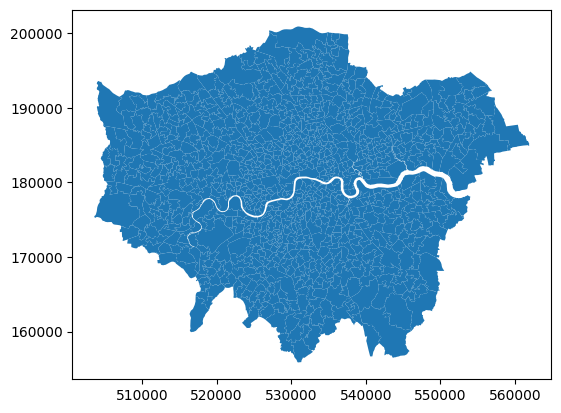

In [13]:
# Read the shapefile
lon_msoa_file = 'Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\MSOA_2011_London_gen_MHW.shp'
lon_msoa = gpd.read_file(lon_msoa_file)

# Plot the London borough
lon_msoa.plot()

# Show the plot
plt.show()


In [15]:
# 读取Shapefile文件
lon_msoa = gpd.read_file('Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\MSOA_2011_London_gen_MHW.shp')

# 检查DataFrame的列，以确定哪一列包含区域名称
print(lon_msoa.columns)

# 假设区域名称存储在名为'NAME'的列中，打印出所有唯一的区域名称
# 请根据实际列名调整'NAME'
# print(lon_msoa['NAME'].unique())

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Chailee\AppData\Local\Temp\ipykernel_20748\3237007888.py:2: SyntaxWarning: invalid escape sequence '\l'
  lon_msoa = gpd.read_file('Data\london_boundaries\statistical-gis-boundaries-london\statistical-gis-boundaries-london\ESRI\MSOA_2011_London_gen_MHW.shp')


Index(['MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM', 'RGN11CD', 'RGN11NM',
       'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ',
       'geometry'],
      dtype='object')


In [18]:
lon_msoa.head(10)

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."
5,E02000007,Barking and Dagenham 006,E09000002,Barking and Dagenham,E12000007,London,8791,8672,119,50.6,3441,2.5,"POLYGON ((549819.930 187080.679, 549950.750 18..."
6,E02000008,Barking and Dagenham 007,E09000002,Barking and Dagenham,E12000007,London,11569,11564,5,81.5,4591,2.5,"POLYGON ((548171.431 186545.742, 548136.262 18..."
7,E02000009,Barking and Dagenham 008,E09000002,Barking and Dagenham,E12000007,London,8395,8376,19,87.4,3212,2.6,"POLYGON ((546855.000 186318.000, 546805.432 18..."
8,E02000010,Barking and Dagenham 009,E09000002,Barking and Dagenham,E12000007,London,8615,8615,0,76.8,3292,2.6,"POLYGON ((549618.850 185517.065, 549637.021 18..."
9,E02000011,Barking and Dagenham 010,E09000002,Barking and Dagenham,E12000007,London,6187,6086,101,38.8,2289,2.7,"POLYGON ((550244.137 185994.019, 550272.848 18..."


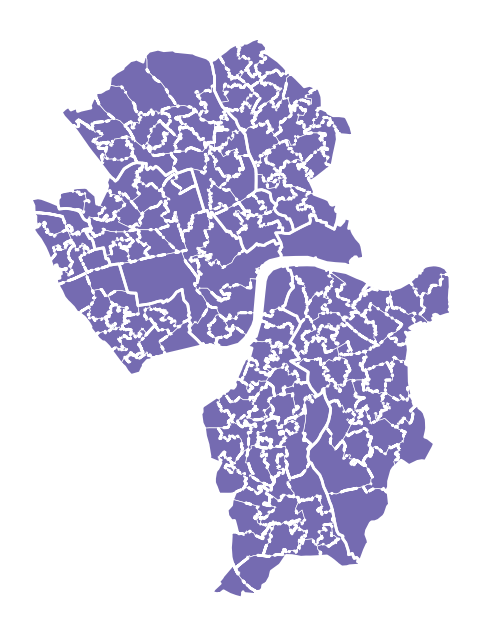

In [26]:


# 筛选指定的boroughs
selected_boroughs = lon_msoa[lon_msoa['LAD11NM'].isin(['City of London', 'Islington', 'Kensington and Chelsea', 'Westminster', 'Camden', 'Lambeth', 'Southwark'])]

# 按'LAD11NM'合并'MSOA11CD'以创建大区域的轮廓
boroughs_outline = selected_boroughs.dissolve(by='LAD11NM')

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制大区域的轮廓，使用粗线条
boroughs_outline.boundary.plot(ax=ax, color='white', linewidth=2)

# 在相同的图上，绘制原始的selected_boroughs数据，显示大区域内部的'MSOA11CD'边界，使用细线条
selected_boroughs.plot(ax=ax, color='#756bb1', edgecolor='white', linewidth=0.5)

# 关闭轴显示
ax.axis('off')

plt.show()

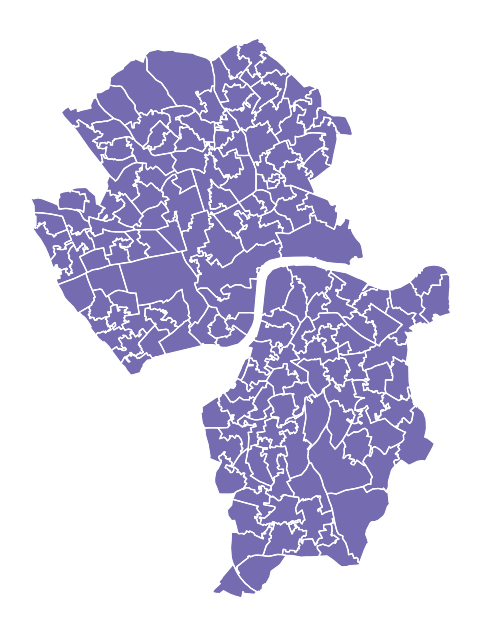

In [22]:

# 筛选指定的boroughs
selected_boroughs = lon_msoa[lon_msoa['LAD11NM'].isin(['City of London', 'Islington', 'Kensington and Chelsea', 'Westminster', 'Camden', 'Lambeth', 'Southwark'])]

# 创建图形和轴
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制筛选后的boroughs，设置内部线条颜色和宽度
selected_boroughs.plot(ax=ax, color='#756bb1', edgecolor='white', linewidth=0.5)

# 再次绘制外框线条，仅绘制边界，设置更粗的线宽
selected_boroughs.boundary.plot(ax=ax, color='white', linewidth=1)

# 关闭轴显示
ax.axis('off')

plt.show()

# Station side

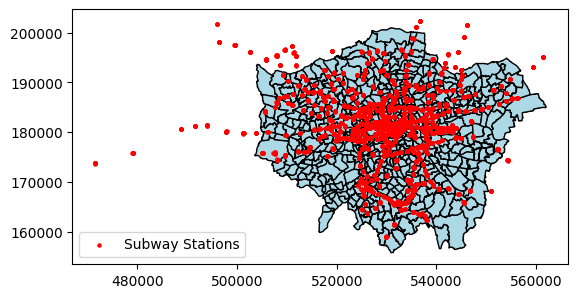

In [ ]:

# 读取地铁站点数据
station_df = pd.read_csv('Data\\traffic_geo_data\\StationPoints.csv')

# 将DataFrame转换为GeoDataFrame，假设使用WGS84坐标系（EPSG:4326）
geometry = [Point(xy) for xy in zip(station_df['Lon'], station_df['Lat'])]
station_gdf = gpd.GeoDataFrame(station_df, geometry=geometry, crs="EPSG:4326")

# 转换坐标系到英国国家网格（EPSG:27700）
station_gdf = station_gdf.to_crs("EPSG:27700")

# 读取伦敦区域数据，假设已经是EPSG:27700
lon_borough = gpd.read_file('Data\\london_boundaries\\London-wards-2018\\London-wards-2018_ESRI\\London_Ward_CityMerged.shp')

# 绘制地图
fig, ax = plt.subplots()
lon_borough.plot(ax=ax, color='lightblue', edgecolor='black')  # 绘制伦敦区域
station_gdf.plot(ax=ax, markersize=5, color='red', label='Subway Stations')  # 绘制地铁站点
plt.legend()
plt.show()